# Statistics Assignment 2 Part 1
###### Jingran Weng, Uddhava Swaminathan

Our data has two samples with independent observations. We are testing whether the observations for both samples were conducted on the same wood. If so, their kappa numbers should follow the same normal distribution.   

Our null hypothesis is $$H_{0} \rightarrow \mu_{1} = \mu_{2} $$
Our alternate hypothesis is $$H_{1} \rightarrow \mu_{1} \neq \mu_{2}$$  

We have 20 observations(n) and 2 samples. Therefore, we will use a two sample t-test from python.  

However, we first need to evaluate the variances of both the samples. For this purpose, we will use Bartlett's test (cited in report) to test the following null hypothesis:  

Null hypothesis is $$H_{0} \rightarrow \sigma_{1} = \sigma_{2} $$
Alternate hypothesis is $$H_{1} \rightarrow \sigma_{1} \neq \sigma_{2}$$  

Due to a p-value of 0.46 from Bartlett's test, we cannot reasonably reject the null hypothesis and therefore it is assumed that both populations have equal variances. Therefore, we conduct a pooled t-test.

In [19]:
#Bartlett's Test for variance.
import csv
import os
from scipy import stats #if error, run pip install scipy on your system.


#Use the below command if the directory is incorrect!
#os.chdir(r'C:\Users\uddha\OneDrive\Documents\GitHub\PythonExperiments\Stats')  
period_1 = []
period_2 = []
#print(os.getcwd())
try:
    with open('Group_67_Question_1_Data.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            period_1.append(float(row['Period 1']))
            period_2.append(float(row['Period 2']))
except:
    #If you are not sure what your current directory is, use the commented print(os.getcwd()) above in a separated code cell.
    print("You probably haven't selected the right path. Fix os.chdir and ensure it points to the data file!")
else:   
    print(stats.bartlett(period_1, period_2))

BartlettResult(statistic=0.5453720287439701, pvalue=0.4602148709372391)


In [20]:
#Please run the snippets to see the data. 
import csv
import os
from scipy import stats #if error, run pip install scipy on your system.

#Use the below command if the directory is incorrect!
#os.chdir(r'C:\Users\uddha\OneDrive\Documents\GitHub\PythonExperiments\Stats')  
period_1 = []
period_2 = []
#print(os.getcwd())
try:
    with open('Group_67_Question_1_Data.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            period_1.append(float(row['Period 1']))
            period_2.append(float(row['Period 2']))
except:
    #If you are not sure what your current directory is, use the commented print(os.getcwd()) above in a separated code cell.
    print("You probably haven't selected the right path. Fix os.chdir and ensure it points to the data file!")
else:   
    print(stats.ttest_ind(period_1, period_2))


Ttest_indResult(statistic=7.252346155390379, pvalue=1.1233195506789943e-08)


## Result
From the evaluation, our p value is less than **0.05 (5% threshold)** and **0.01 (1% threshold)**. Therefore, we can reject our null hypothesis and conclude that it is very likely that the wood from both periods are from different species. 

*It is important to note our result makes an assumption: There are no other alternative hypotheses that can explain the situation.*

## Why the t-test?
The t-test is applicable since our sample size is too low(n = 20) for a z-test(n > 30) and the population variance is unknown. 
The t-test is fully applicable to this scenario.
 - The data values are independent. Each observation is unaffected by the last one or the subsequent one. 
 - We assume the observations represent a simple random sample from the population of kappa numbers in the reactors.
 - The data is assumed to be normally distributed. This isn't true in our case actually as can be seen from Appendix A but it is assumed to make evaluation simpler since hypothesis testing for non-normal distributions is outside the scope of this course. 
 - The data is continuous.

## Appendices

### Appendix A: Normality of data

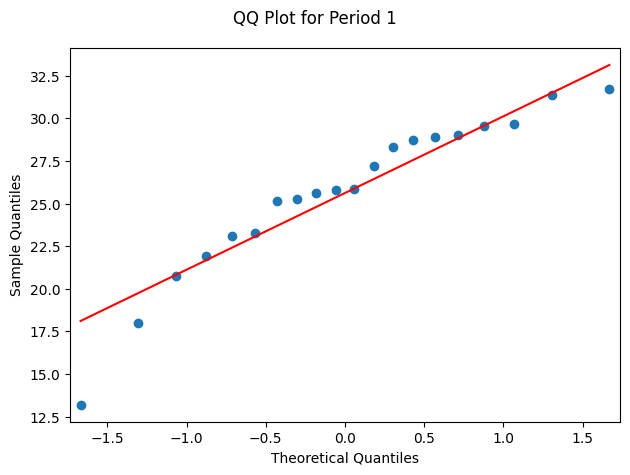

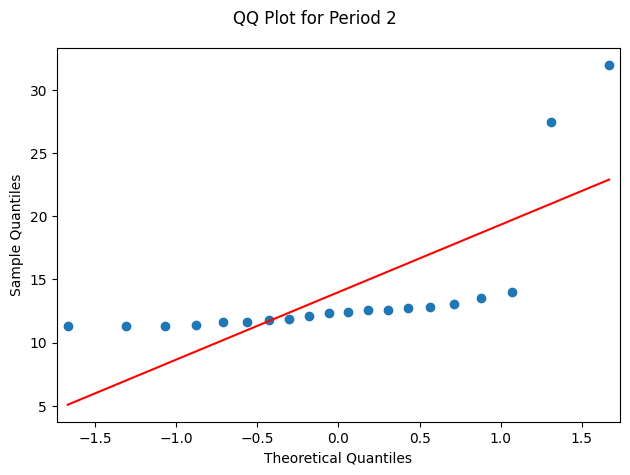

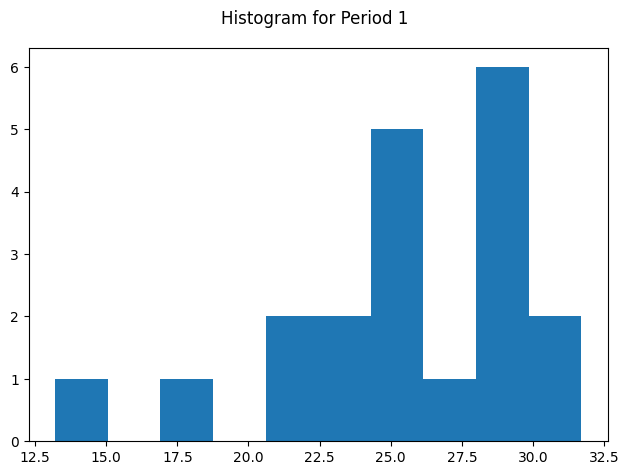

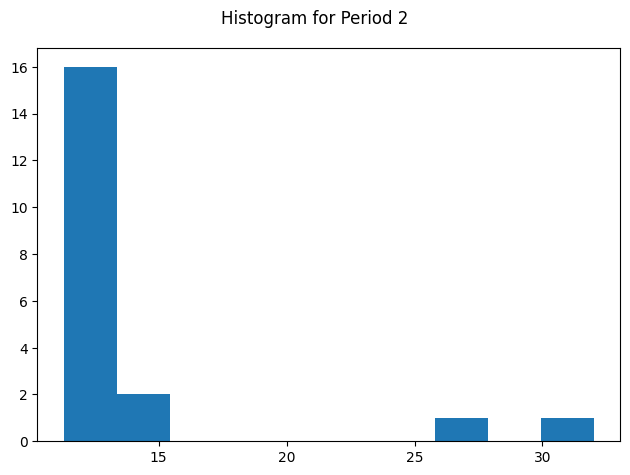

Shapiro Test Results: 
ShapiroResult(statistic=0.9211326241493225, pvalue=0.1041874885559082)
ShapiroResult(statistic=0.48705464601516724, pvalue=2.4327061964868335e-07)


In [21]:
#Please run the snippets to see the data. 
from statsmodels.graphics.gofplots import qqplot #if error, run pip install statsmodels on your system
from matplotlib import pyplot #if error, run pip install matplotlib on your system
import numpy as np #if error, run pip install numpy on your system
import csv
import os
from scipy import stats #if error, run pip install scipy on your system

#Use the below command only if the directory is incorrect!
#os.chdir(r'C:\Users\uddha\OneDrive\Documents\GitHub\PythonExperiments\Stats')
period_1 = []
period_2 = []
#print(os.getcwd())
try:
    with open('Group_67_Question_1_Data.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            period_1.append(float(row['Period 1']))
            period_2.append(float(row['Period 2']))
except:
    #If you are not sure what your current directory is, use the commented print(os.getcwd()) above in a separated code cell.
    print("You probably haven't selected the right path. Fix os.chdir and ensure it points to the data file!")
else:
    ax1 = qqplot(np.array(period_1), line='s')
    ax2 = qqplot(np.array(period_2), line='s')

fig1 = pyplot.figure(3)
pyplot.hist(period_1)

fig2 = pyplot.figure(4)
pyplot.hist(period_2)
ax1.suptitle('QQ Plot for Period 1')
ax1.set_layout_engine(layout='tight')
ax2.suptitle('QQ Plot for Period 2')
ax2.set_layout_engine(layout='tight')
fig1.suptitle('Histogram for Period 1')
fig1.set_layout_engine(layout='tight')
fig2.suptitle('Histogram for Period 2')
fig2.set_layout_engine(layout='tight')
pyplot.show()
print("Shapiro Test Results: ")
print(stats.shapiro(period_1))
print(stats.shapiro(period_2))

***As can be seen from the above plots, only period 1 has a reasonably normal distribution. Period 2 has an extreme skew and is not normally distributed.***  
For the purpose of evaluating normality, we will use Shapiro's test (cited in report) to test the following null hypothesis:  

Null hypothesis is $$H_{0} \rightarrow \textnormal{Data is taken from a normally distributed population} $$
Alternate hypothesis is $$H_{1} \rightarrow \textnormal{Data is not taken from a normally distributed population} $$  

Our results are 0.1 (>0.05) for the first period allowing us to accept the null hypothesis, and 2.43e-7 (<0.05) for the second period preventing us from accepting the null hypothesis and forcing us to accept that the data is not taken from a normally distributed population. 
However, we cannot actually use this information to change our tests due to the scope of this course. This information is simply provided to educate the reader about the data used and possible problems with the conclusions drawn.